# Estimating return periods of extreme values

In [1]:
import earthkit.data as ekd
import earthkit.meteo.stats as ekm_stats
import earthkit.plots as ekp

ekd.settings.set("cache-policy", "user")

Load a timeseries of yearly maximum 1-day precipitation from CDS: https://doi.org/10.24381/cds.3a9c4f89

In [2]:
rx1day = ekd.from_source(
    "cds",
    "sis-european-risk-extreme-precipitation-indicators",
    spatial_coverage=["europe"],
    variable=["maximum_1_day_precipitation"],
    product_type=["era5"],
    temporal_aggregation=["yearly"],
    period=[
        "1979", "1980", "1981", "1982", "1983",
        "1984", "1985", "1986", "1987", "1988",
        "1989", "1990", "1991", "1992", "1993",
        "1994", "1995", "1996", "1997", "1998",
        "1999", "2000", "2001", "2002", "2003",
        "2004", "2005", "2006", "2007", "2008",
        "2009", "2010", "2011", "2012", "2013",
        "2014", "2015", "2016", "2017", "2018",
        "2019"
    ]
)

Fit an extreme value distribution to the timeseries of maximum precipitation values at every gridpoint:

In [3]:
dist = ekm_stats.GumbelDistribution.fit(rx1day.to_numpy(), axis=0)

Determine the return period of years where the maximum daily precipitation exceeds a threshold value (here: 30 mm) based on the fitted distribution:

In [4]:
threshold = 30.

return_period = ekm_stats.value_to_return_period(dist, threshold)

Visualize the computed return periods on a map:

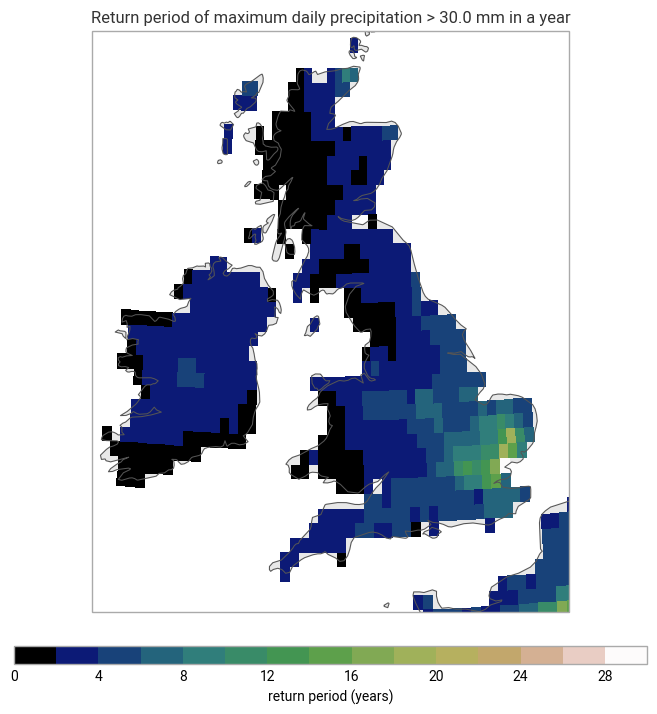

In [5]:
coords = rx1day.to_latlon()

chart = ekp.Map(domain=["UK", "Ireland"])
chart.grid_cells(x=coords["lon"], y=coords["lat"], z=return_period, colors="gist_earth")

chart.title(f"Return period of maximum daily precipitation > {threshold} mm in a year")
chart.legend(label="return period (years)")

chart.coastlines()
chart.land()